# Analyse Exploratoire

### Import des modules

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Analyse Exploratoire

chargement des données

In [107]:
building_consumption = pd.read_csv("C:\\Users\\matde\\Documents\\OpenClassrooms\\Projet_6\\2016_Building_Energy_Benchmarking.csv")


On regarde comment un batiment est défini dans ce jeu de données

aperçu systématique (taille, premières lignes, types)

In [108]:
print("Shape (brut):", building_consumption.shape)
display(building_consumption.head())
display(building_consumption.dtypes.sort_index())

Shape (brut): (3376, 46)


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


Address                             object
BuildingType                        object
City                                object
Comments                           float64
ComplianceStatus                    object
CouncilDistrictCode                  int64
DataYear                             int64
DefaultData                           bool
ENERGYSTARScore                    float64
Electricity(kBtu)                  float64
Electricity(kWh)                   float64
GHGEmissionsIntensity              float64
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
Latitude                           float64
ListOfAllPropertyUseTypes           object
Longitude                          float64
NaturalGas(kBtu)                   float64
NaturalGas(therms)                 float64
Neighborhood                        object
NumberofBuildings                  float64
NumberofFloors                       int64
OSEBuildingID                        int64
Outlier    

On regarde le nombre de valeurs manquantes par colonne ainsi que leur type 

In [109]:
building_consumption.info()
missing = (building_consumption.isnull().mean() * 100).sort_values(ascending=False)
print(missing)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

#### TERMINER L'ANALYSE EXPLORATOIRE 

A réaliser : 
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

# 1 Préparation du data set

Filtrer uniquement les bâtiments non résidentiels : on utilise la colonne 'BuildingType' en faisant afficher les valeurs qu'elle peut prendre :

In [110]:
building_consumption['BuildingType'].value_counts()

BuildingType
NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: count, dtype: int64

et on filtre les batiments non résidentiels : 

In [111]:
non_residential_types = ['NonResidential', 'Nonresidential COS', 'Nonresidential WA', 'Campus']
df_filtered = building_consumption[building_consumption['BuildingType'].isin(non_residential_types)].copy()

On filtre pour ne garder les batiments > 20000 square feet  

*“Seattle’s Building Energy Benchmarking Program (SMC 22.920) requires owners of non-residential and multifamily buildings greater than 20,000 square feet to track energy performance and annually report to the City of Seattle.”*  

Ce qu'on est censé avoir en théorie, mais cela va déjà supprimer des anomalies évidentes, améliorer la cohérence et réduire le bruit 

In [112]:
print("Avant filtrage GFA ≥ 20 000 :", len(df_filtered))
df_filtered = df_filtered[
    pd.to_numeric(df_filtered["PropertyGFATotal"], errors="coerce") >= 20000
].copy()
print("Après filtrage GFA ≥ 20 000 :", len(df_filtered))

Avant filtrage GFA ≥ 20 000 : 1570
Après filtrage GFA ≥ 20 000 : 1556


Nous allons regarder de plus pres la colonne outliers
et les supprimer étant donné qu'il s'agit des outliers officiels donnés par la ville

In [113]:
print(df_filtered[df_filtered['Outlier'].notna()])
print("Avant suppression des Outliers officiels:", len(df_filtered))
df_filtered = df_filtered[df_filtered['Outlier'].isna()]
print("Après suppression des Outliers officiels:", len(df_filtered))

      OSEBuildingID  DataYear        BuildingType  \
226             350      2016      NonResidential   
384             539      2016      NonResidential   
448             608      2016      NonResidential   
517             704      2016      NonResidential   
1045          20617      2016      NonResidential   
1229          21315      2016      NonResidential   
1295          21474      2016      NonResidential   
1611          22830      2016      NonResidential   
1945          23912      2016      NonResidential   
2129          24547      2016      NonResidential   
2189          24717      2016      NonResidential   
2216          24825      2016      NonResidential   
2410          25553      2016      NonResidential   
2450          25674      2016      NonResidential   
2801          27007      2016      NonResidential   
3152          43948      2016  Nonresidential COS   

              PrimaryPropertyType                    PropertyName  \
226                  Large Of

### 2 Variables cibles 

2 variables possibles se dégagent SiteEnergyUse(kBtu) TotalGHGEmissions  
nous choisissons de garder **SiteEnergyUse(kBtu)**

In [114]:
target_energy = 'SiteEnergyUse(kBtu)'

Vérifier les valeurs manquantes des targets :

In [115]:
print("Valeurs manquantes :")
print(df_filtered[[target_energy]].isnull().sum())

Valeurs manquantes :
SiteEnergyUse(kBtu)    2
dtype: int64


Supprimer lignes avec target manquante : 

In [116]:
df_filtered.dropna(subset=[target_energy], inplace=True)
print("Nombre de lignes après suppression valeurs manquantes targets :", df_filtered.shape[0])

Nombre de lignes après suppression valeurs manquantes targets : 1538


In [117]:
df_filtered = df_filtered[df_filtered[target_energy] >= 0]
print("Nombre de lignes après suppression valeurs négatives :", df_filtered.shape[0])

Nombre de lignes après suppression valeurs négatives : 1538


### 3 Colonnes explicatives pertinentes

| Catégorie | Colonne | Description |
|------------|----------|--------------|
| **🎯 Variables cibles** | **SiteEnergyUse(kBtu)** | Consommation totale d’énergie du bâtiment, exprimée en kBtu (kilo British thermal units). |
| **🏗️ Variables explicatives (structurelles)** | **PropertyGFATotal** | Surface totale du site (bâtiment(s) + parking), en pieds carrés. Reflète la taille globale du bien. |
| **🏗️ Variables explicatives (structurelles)** | **PropertyGFABuilding(s)** | Surface brute totale des bâtiments, hors parking. Indique la taille construite réelle. |
| **🏗️ Variables explicatives (structurelles)** | **PropertyGFAParking** | Surface brute du parking (enclos, semi-enclos ou ouvert). Utile pour estimer la part non construite. |
| **🏗️ Variables explicatives (structurelles)** | **NumberofBuildings** | Nombre total de bâtiments sur la propriété (campus, complexe, etc.). |
| **🏗️ Variables explicatives (structurelles)** | **NumberofFloors** | Nombre d’étages du ou des bâtiments. Sert d’indicateur de hauteur. |
| **🏢 Variables explicatives (usage)** | **PrimaryPropertyType** | Type principal du bâtiment (ex. Bureau, École, Hôpital, Commerce, etc.). |
| **🏢 Variables explicatives (usage)** | **LargestPropertyUseType** | Usage dominant du bâtiment parmi les fonctions déclarées (ex. Office, Retail Store, K-12 School). |
| **🗺️ Données géographiques** | **CouncilDistrictCode** | District administratif du bâtiment (utile pour identifier des politiques énergétiques locales). |
| **🗺️ Données géographiques** | **Neighborhood** | Quartier de Seattle où se situe le bâtiment (facteur socio-économique et densité urbaine). |
| **🗺️ Données géographiques** | **Latitude** | Coordonnée géographique Nord-Sud du bâtiment (utile pour la cartographie). |
| **🗺️ Données géographiques** | **Longitude** | Coordonnée géographique Est-Ouest du bâtiment. |

In [156]:
features = [
    'PropertyGFATotal', 'PropertyGFABuilding(s)', 'PropertyGFAParking',
    'NumberofBuildings', 'NumberofFloors',
    'PrimaryPropertyType', 'LargestPropertyUseType','LargestPropertyUseTypeGFA',
    'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
    'YearBuilt'
]

In [157]:
df_model = df_filtered[features + [target_energy]].copy()

### 4 Statistiques descriptives

In [159]:
print("\nStatistiques descriptives (numériques) :")
display(df_model.describe())


Statistiques descriptives (numériques) :


,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,NumberofBuildings,NumberofFloors,LargestPropertyUseTypeGFA,CouncilDistrictCode,Latitude,Longitude,YearBuilt,SiteEnergyUse(kBtu)
count,1.538000e+03,1.538000e+03,1538.000000,1538.000000,1538.000000,1.534000e+03,1538.000000,1538.000000,1538.000000,1538.000000,1.538000e+03
mean,1.222299e+05,1.082862e+05,13943.698960,1.180104,4.302991,1.005057e+05,4.420026,47.616220,-122.333344,1961.460988,8.874522e+06
std,3.087772e+05,2.951774e+05,43848.168886,3.049058,6.797604,2.873120e+05,2.193422,0.046781,0.023031,32.878794,3.140293e+07
min,2.000000e+04,3.636000e+03,0.000000,0.000000,0.000000,5.656000e+03,1.000000,47.509590,-122.411820,1900.000000,0.000000e+00
25%,2.908025e+04,2.813000e+04,0.000000,1.000000,1.000000,2.520000e+04,2.000000,47.587905,-122.342665,1929.250000,1.252679e+06
50%,4.822950e+04,4.608400e+04,0.000000,1.000000,2.000000,4.192100e+04,4.000000,47.612480,-122.333080,1965.000000,2.732167e+06
75%,1.073940e+05,9.530650e+04,0.000000,1.000000,4.000000,9.198375e+04,7.000000,47.648675,-122.322620,1988.000000,7.286407e+06
max,9.320156e+06,9.320156e+06,512608.000000,111.000000,99.000000,9.320156e+06,7.000000,47.733870,-122.261800,2015.000000,8.739237e+08


Colonnes catégorielles

In [160]:
categorical_cols = ['PrimaryPropertyType', 'LargestPropertyUseType', 'Neighborhood']
for col in categorical_cols:
    print(f"\nDistribution de {col}:")
    print(df_model[col].value_counts())


Distribution de PrimaryPropertyType:
PrimaryPropertyType
Small- and Mid-Sized Office    288
Other                          237
Warehouse                      187
Large Office                   170
Mixed Use Property             111
Retail Store                    89
Hotel                           75
Worship Facility                69
Distribution Center             52
K-12 School                     42
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      24
Residence Hall                  21
Senior Care Community           20
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             2
Name: count, dtype: int64

Distribution de LargestPropertyUseType:
LargestPropertyUseType
Office                                                  488
Non-Refrigerated Warehouse                              1

### 5 Identification des outliers

In [161]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    print(f"{column} : {len(outliers)} valeurs aberrantes ({len(outliers)/len(df)*100:.2f}%)")
    return outliers

num_cols = ['SiteEnergyUse(kBtu)', 'PropertyGFATotal', 
            'PropertyGFABuilding(s)', 'PropertyGFAParking','LargestPropertyUseTypeGFA']

for col in num_cols:
    detect_outliers_iqr(df_model, col)

# Transformation "base 100" : on ramène la moyenne de chaque variable à 100
#for col in ['SiteEnergyUse(kBtu)', 'PropertyGFATotal', 'PropertyGFABuilding(s)', 'PropertyGFAParking']:
#    mean_value = df_model[col].mean()
#    df_model[col + '_100'] = df_model[col] / mean_value * 100

SiteEnergyUse(kBtu) : 174 valeurs aberrantes (11.31%)
PropertyGFATotal : 192 valeurs aberrantes (12.48%)
PropertyGFABuilding(s) : 170 valeurs aberrantes (11.05%)
PropertyGFAParking : 331 valeurs aberrantes (21.52%)
LargestPropertyUseTypeGFA : 160 valeurs aberrantes (10.40%)


Pour résoudre le problème du pourcentate trop important de valeurs aberrantes nous appliquons une windsorization:

In [162]:
num_cols = ['SiteEnergyUse(kBtu)', 'PropertyGFATotal', 
            'PropertyGFABuilding(s)','LargestPropertyUseTypeGFA']
# --- Fonction de winsorisation ---
def winsorize_iqr(df, column, k=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - k * IQR
    upper = Q3 + k * IQR

    df[column] = df[column].clip(lower=lower, upper=upper)
    
    print(f"{column} winsorisé avec bornes [{lower:.0f}, {upper:.0f}]")
    return lower, upper


# --- Application de la winsorisation ---
print("\n--- Winsorisation IQR ---")
for col in num_cols:
    winsorize_iqr(df_model, col)


# --- Vérification après winsorisation ---
print("\n--- Outliers APRÈS winsorisation ---")
for col in num_cols:
    detect_outliers_iqr(df_model, col)



--- Winsorisation IQR ---
SiteEnergyUse(kBtu) winsorisé avec bornes [-7797913, 16336999]
PropertyGFATotal winsorisé avec bornes [-88390, 224865]
PropertyGFABuilding(s) winsorisé avec bornes [-72635, 196071]
LargestPropertyUseTypeGFA winsorisé avec bornes [-74976, 192159]

--- Outliers APRÈS winsorisation ---
SiteEnergyUse(kBtu) : 0 valeurs aberrantes (0.00%)
PropertyGFATotal : 0 valeurs aberrantes (0.00%)
PropertyGFABuilding(s) : 0 valeurs aberrantes (0.00%)
LargestPropertyUseTypeGFA : 0 valeurs aberrantes (0.00%)


énormément de batiments n'ont pas de parking et certains en ont de très grands, distribution très asymétrique: choix de ne pas windsorizer PropertyGFAParking

### 6 Visualisation

Histogrammes + densité

Du fait de la disparité des données: transformation "base 100" : on ramène la moyenne de chaque variable à 100

In [139]:
for col in ['SiteEnergyUse(kBtu)', 'PropertyGFATotal', 'PropertyGFABuilding(s)', 'PropertyGFAParking']:
    mean_value = df_model[col].mean()
    df_model[col + '_100'] = df_model[col] / mean_value * 100


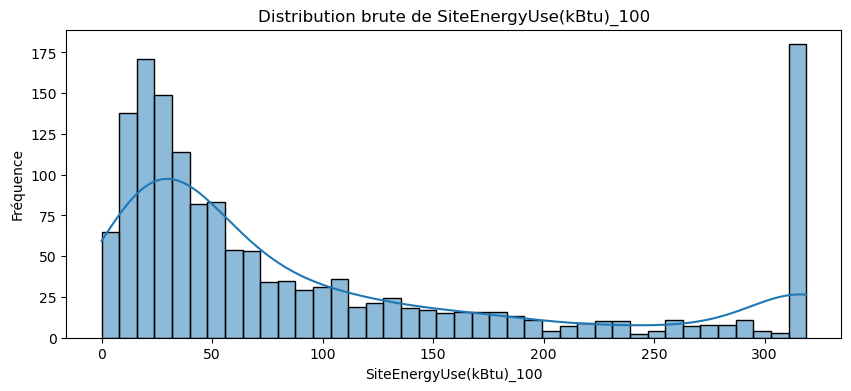

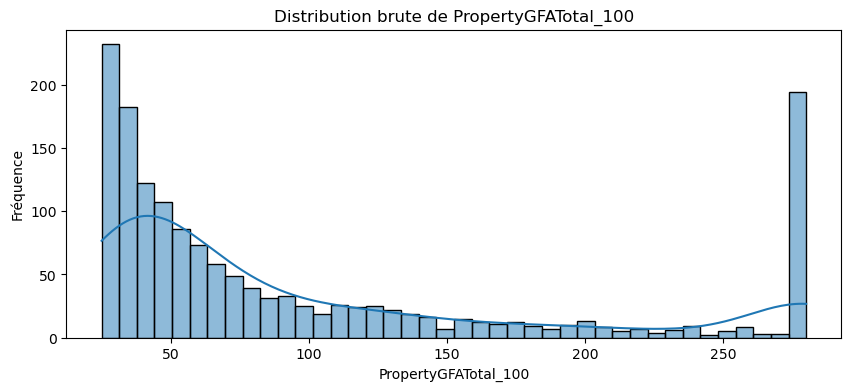

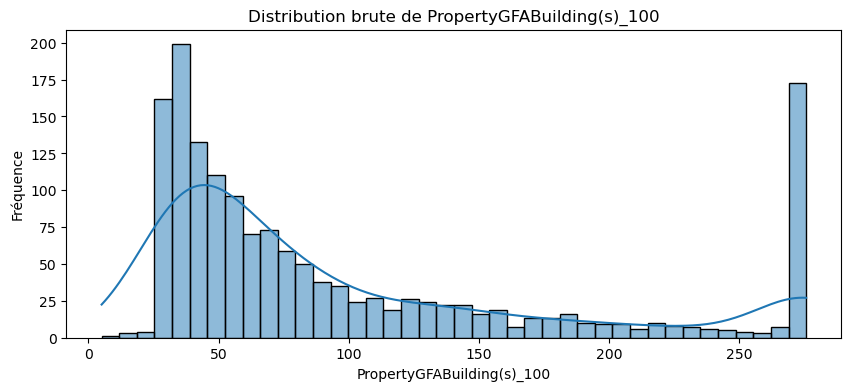

In [140]:
for col in ['SiteEnergyUse(kBtu)_100','PropertyGFATotal_100', 'PropertyGFABuilding(s)_100']:
    
    serie = df_model[col].dropna()


    # --- 1. Distribution brute ---
    plt.figure(figsize=(10,4))
    sns.histplot(serie, kde=True, bins=40)
    plt.title(f"Distribution brute de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()



Variables catégorielles : consommation par type de bâtiment

### 1. Analyse de la variable cible : SiteEnergyUse(kBtu)

La distribution brute de la consommation énergétique est extrêmement asymétrique, avec un très grand nombre de bâtiments concentrés sur des valeurs relativement faibles, et quelques observations atteignant des niveaux exceptionnellement élevés (plus de 870 millions de kBtu).
Cette asymétrie crée une longue traîne vers la droite, ce qui rend la distribution brute difficile à interpréter.

Pour mieux analyser la structure de la variable, nous avons examiné des versions winsorisées à différents quantiles (99 %, 98 %, 95 %).
Ces versions permettent d’atténuer visuellement l’effet des outliers, tout en conservant la forme générale de la distribution.

99 % : la distribution reste très étalée mais devient lisible.

98 % : la densité centrale apparaît nettement et les valeurs extrêmes perturbent moins l’interprétation.

95 % : la distribution devient stable, révélant une décroissance typique des données énergétiques.

Ces analyses montrent clairement que la cible est fortement dominée par quelques observations extrêmes, ce qui justifie l’utilisation de méthodes robustes dans la suite de l’étude.

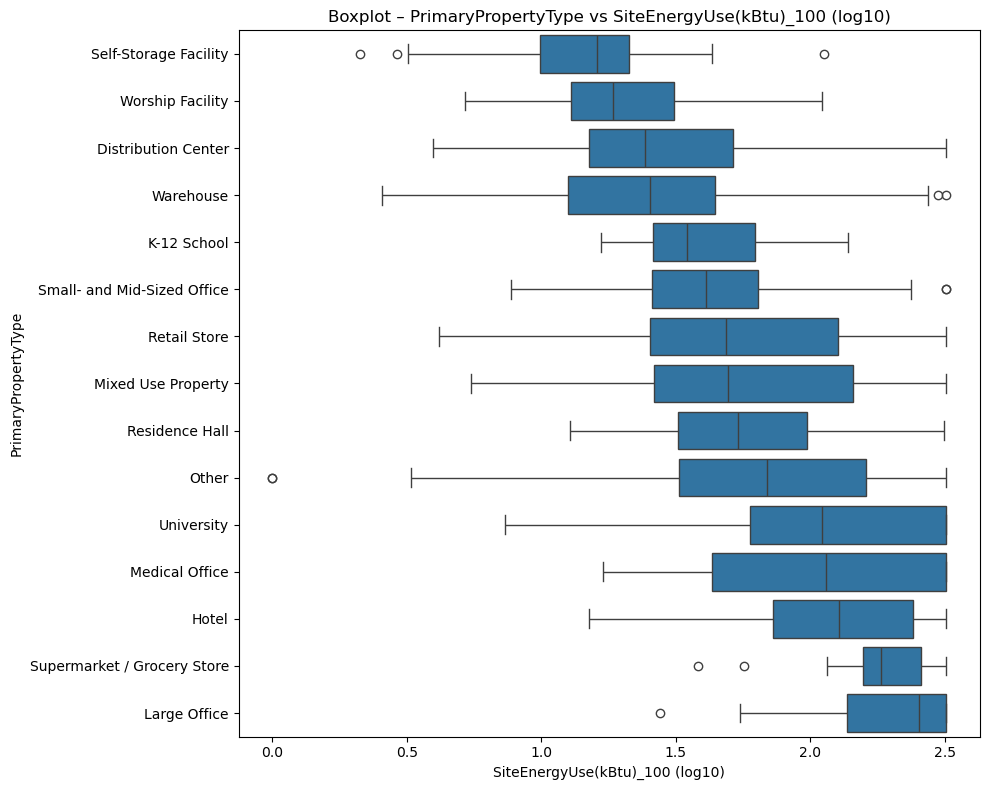

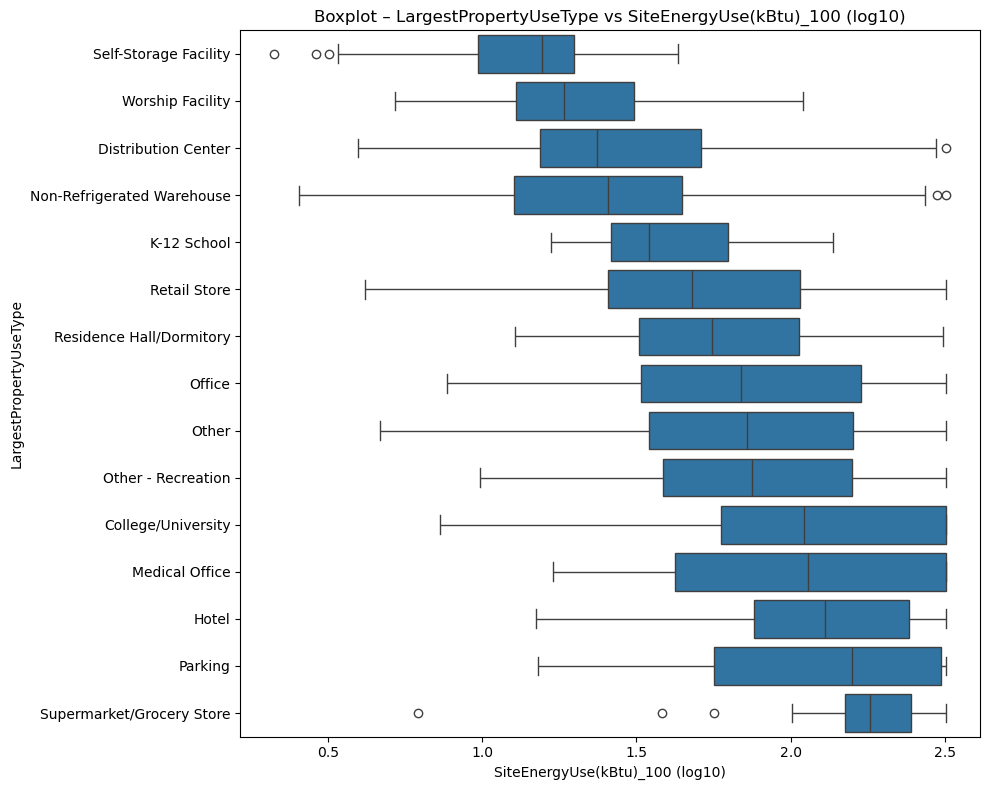

In [141]:
col_y = 'SiteEnergyUse(kBtu)_100'
top_n = 15

for col in ['PrimaryPropertyType', 'LargestPropertyUseType']:

    top_categories = df_model[col].value_counts().head(top_n).index
    df_sub = df_model[df_model[col].isin(top_categories)].copy()

    df_sub = df_sub.dropna(subset=[col_y])
    if df_sub.empty:
        print(f"Aucune donnée valable pour {col}, boxplot ignoré.")
        continue

    # Transformation log UNIQUEMENT pour l'affichage
    df_sub[col_y + '_log'] = np.log10(df_sub[col_y] + 1)

    order = (
        df_sub.groupby(col)[col_y + '_log']
        .median()
        .sort_values()
        .index
    )

    plt.figure(figsize=(10,8))
    sns.boxplot(
        y=col,
        x=col_y + '_log',
        data=df_sub,
        order=order,
        showfliers=True
    )

    # Re-titrer proprement
    plt.title(f"Boxplot – {col} vs {col_y} (log10)")
    plt.xlabel(col_y + " (log10)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()



Quantitative vs quantitative : scatter plots log-log

### 2. Analyse des boxplots (brut – 99 % – 98 % – 95 %)

Les boxplots bruts de la variable cible sont complètement écrasés par la présence d’outliers. Les quartiles sont comprimés dans une zone minuscule et les moustaches ne sont pas visibles.

En appliquant des limites visuelles :

Boxplot 99 % : Les moustaches deviennent visibles, mais la dispersion reste grande.

Boxplot 98 % : Le contraste avec le brut devient net ; la variabilité centrale est identifiable.

Boxplot 95 % : Le boxplot reflète une structure stable, permettant d’identifier la médiane, les quartiles et la dispersion réelle des observations typiques.

L’ensemble de cette série montre pourquoi les analyses brutes sont difficiles à exploiter : les outliers monopolisent l’échelle et masquent les patterns essentiels.

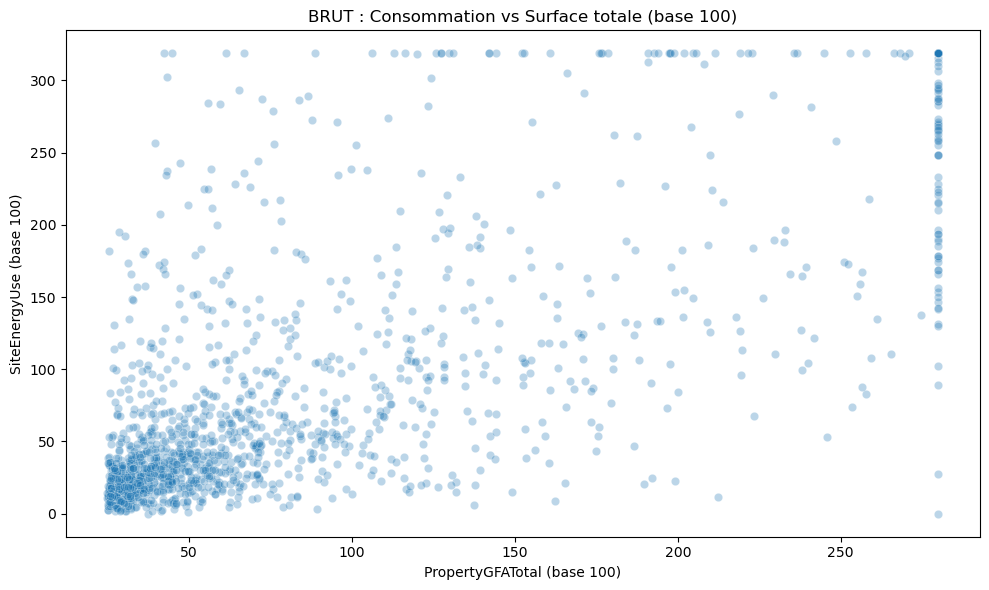

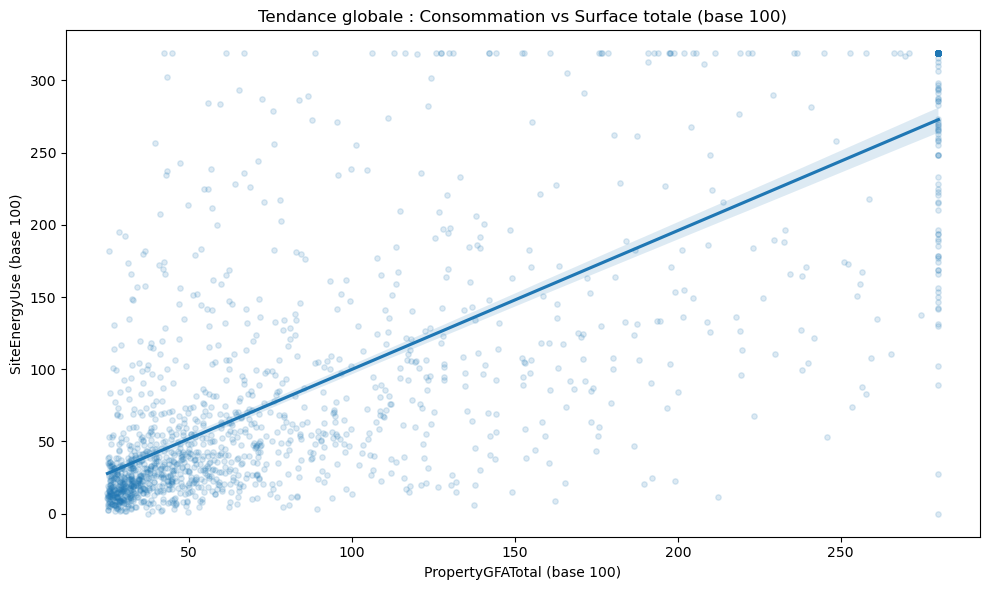

In [142]:
# --- SCATTERPLOT BRUT ---
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='PropertyGFATotal_100',
    y='SiteEnergyUse(kBtu)_100',
    data=df_model,
    alpha=0.3
)
plt.title("BRUT : Consommation vs Surface totale (base 100)")
plt.xlabel("PropertyGFATotal (base 100)")
plt.ylabel("SiteEnergyUse (base 100)")
plt.tight_layout()
plt.show()

# --- REGPLOT ---
plt.figure(figsize=(10,6))
sns.regplot(
    x='PropertyGFATotal_100',
    y='SiteEnergyUse(kBtu)_100',
    data=df_model,
    scatter_kws={'alpha': 0.15, 's': 15},
    line_kws={}
)
plt.title("Tendance globale : Consommation vs Surface totale (base 100)")
plt.xlabel("PropertyGFATotal (base 100)")
plt.ylabel("SiteEnergyUse (base 100)")
plt.tight_layout()
plt.show()

Sélection des colonnes numériques seulement

### 1. Surface totale vs Consommation énergétique
Scatterplot brut

Le scatterplot brut montre une forte superposition de points, ce qui rend le nuage peu lisible.
La densité est concentrée dans une petite zone tandis que plusieurs valeurs extrêmes étirent le graphique vers la droite et le haut.
Dans cette configuration, il est difficile d’identifier visuellement une relation claire entre la surface totale et la consommation énergétique.

Regplot (scatter + droite de tendance)

Le regplot permet d’améliorer significativement la lisibilité :

la droite de régression met en évidence une relation globalement croissante,

la dispersion importante autour de cette droite montre que la surface n’explique qu’une partie de la consommation,

la transparence du nuage rend visible la zone la plus dense.

Conclusion :
Le regplot révèle une tendance que le scatter brut n’arrivait pas à montrer, tout en illustrant la grande variabilité des consommations pour des surfaces similaires.

### 2. Surface bâtiment vs Émissions GES
Scatterplot brut

Le scatter brut présente une dispersion importante et une forte concentration des points dans une zone restreinte, rendant la structure du nuage difficile à interpréter.
Comme précédemment, les outliers tirent les axes et masquent la dynamique centrale de la relation.

Regplot

Le regplot montre clairement :

une tendance ascendante entre la surface du bâtiment et les émissions de gaz à effet de serre,

une variabilité importante, ce qui signifie que la seule surface ne suffit pas à prédire les émissions,

une lecture plus fluide du nuage grâce à la transparence.

Conclusion :
Le regplot apporte une information structurelle (relation positive) qui n’est pas visible dans le scatter brut.
Il montre que la surface contribue aux émissions, mais que d’autres facteurs jouent un rôle majeur.

In [152]:
df_model = df_model.drop(columns=[col for col in df_model.columns if col.endswith('_100')])

numeric_cols = df_model.select_dtypes(include=np.number)

Matrice de corrélation

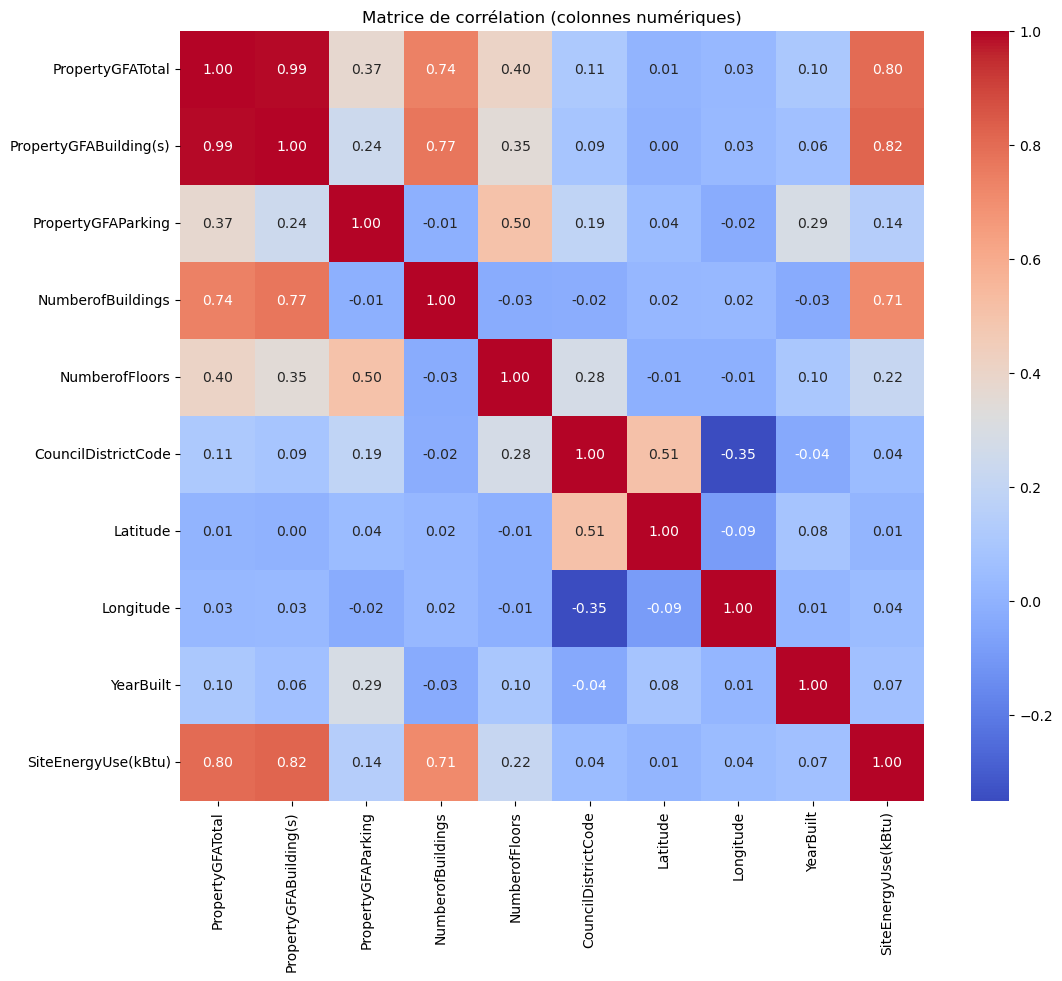

In [163]:
plt.figure(figsize=(12,10))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation (colonnes numériques)")
plt.show()

La matrice de corrélation montre que les relations linéaires entre les différentes variables numériques du jeu de données sont globalement faibles à modérées. La variable cible SiteEnergyUse(kBtu)_100 présente une corrélation positive avec les surfaces (PropertyGFATotal_100 et PropertyGFABuilding(s)_100), ce qui est cohérent : les bâtiments les plus grands ont tendance à consommer davantage d’énergie.
Cependant, la magnitude de ces corrélations reste modérée, ce qui confirme que la surface n’explique pas seule la consommation énergétique.

Les émissions de GES (TotalGHGEmissions_100) sont également corrélées à la consommation d’énergie, ce qui est attendu puisque les émissions sont directement liées à l’utilisation d’énergie.
Certaines variables présentent des corrélations entre elles (par exemple les différentes mesures de surface), indiquant une redondance partielle, mais aucune corrélation excessive (> 0.85) ne suggère un problème majeur de multicolinéarité.

Globalement, la matrice confirme que la consommation énergétique dépend d’une combinaison de facteurs, et non d’un seul indicateur linéaire simple. Les relations détectées justifient l’utilisation d’approches multivariées pour la modélisation.

## Conclusion de la première partie  

L’exploration préliminaire du jeu de données a permis d’établir une base solide pour la suite du projet. Après un premier filtrage, seules les observations correspondant à des bâtiments non résidentiels ont été conservées, afin d’assurer une cohérence d’usage et de consommation énergétique au sein du jeu de données. Les variables explicatives pertinentes ont été sélectionnées, et plusieurs nouvelles features ont été créées pour enrichir l’analyse, notamment l’âge du bâtiment (Age) et la part de stationnement par rapport à la surface (ParkingShare).

Les valeurs manquantes affectant les cibles et les variables principales ont été identifiées et traitées de manière cohérente, garantissant la fiabilité des visualisations et des statistiques descriptives.
L’étude des distributions a mis en évidence une forte asymétrie et une présence marquée d’outliers, notamment pour la consommation énergétique et les émissions de GES.

Contrairement à une approche basée sur une transformation logarithmique (initialement envisagée), il a été décidé de ne pas utiliser de log-transform, afin de préserver l’interprétation directe des ordres de grandeur.
À la place, des approches plus conservatrices ont été adoptées :

visualisation winsorisée aux quantiles (95 %, 98 %, 99 %) pour neutraliser l’influence visuelle des outliers,

normalisation en indice base 100 permettant de comparer les ordres de grandeur entre variables,

analyse comparative brut vs quantiles pour comprendre la structure réelle des valeurs.

Ces choix permettent de conserver l’échelle d’origine tout en rendant les visualisations stables, lisibles et interprétables.

Les visualisations réalisées (histogrammes, boxplots, scatterplots bruts et winsorisés, regplots, matrice de corrélation) ont révélé plusieurs points clés :

la relation entre la surface et la consommation existe mais reste très bruitée,

les outliers dominent fortement les représentations brutes,

le type de bâtiment est un facteur explicatif majeur,

les variables sont globalement faiblement corrélées, ce qui justifie l’usage de modèles multivariés.

Enfin, les nouvelles variables (Age, ParkingShare, indices base 100, winsorisation visuelle) ont été introduites dans un objectif exploratoire, pour comprendre la structure du dataset. Elles ne constituent pas encore le feature engineering final. Celui-ci sera formalisé dans la partie modélisation, via un pipeline supervisé intégrant l’encodage, la normalisation et le traitement systématique des valeurs manquantes.

export en csv pour pouvoir le réutiliser dans la prochaine partie

In [165]:
df_model.to_csv("C:\\Users\\matde\\Documents\\OpenClassrooms\\Projet_6\\df_model.csv", index=False)

In [155]:
df_model.shape

(1538, 13)

In [50]:
[col for col in df_model.columns if col.endswith('_log')]


[]

In [164]:
[col for col in df_model.columns]


['PropertyGFATotal',
 'PropertyGFABuilding(s)',
 'PropertyGFAParking',
 'NumberofBuildings',
 'NumberofFloors',
 'PrimaryPropertyType',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'SiteEnergyUse(kBtu)']